# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
def load_mnist_data() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = load_mnist_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Helpers

### Plotting

In [3]:
def plot_training(history:keras.callbacks.History) -> None:
    for metric, values in history.history.items():
        plt.plot(values, label=metric)

    plt.title('Training History')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Values')
    
    plt.show()

# Basic Approach

Epoch 1/50
375/375 - 4s - 11ms/step - accuracy: 0.8409 - loss: 3.3993 - val_accuracy: 0.9000 - val_loss: 0.9021
Epoch 2/50
375/375 - 2s - 6ms/step - accuracy: 0.9178 - loss: 0.6013 - val_accuracy: 0.9157 - val_loss: 0.6326
Epoch 3/50
375/375 - 2s - 6ms/step - accuracy: 0.9381 - loss: 0.3664 - val_accuracy: 0.9300 - val_loss: 0.4662
Epoch 4/50
375/375 - 2s - 6ms/step - accuracy: 0.9493 - loss: 0.2491 - val_accuracy: 0.9433 - val_loss: 0.3608
Epoch 5/50
375/375 - 2s - 5ms/step - accuracy: 0.9592 - loss: 0.1795 - val_accuracy: 0.9420 - val_loss: 0.3601
Epoch 6/50
375/375 - 2s - 6ms/step - accuracy: 0.9634 - loss: 0.1530 - val_accuracy: 0.9452 - val_loss: 0.3282
Epoch 7/50
375/375 - 2s - 6ms/step - accuracy: 0.9666 - loss: 0.1346 - val_accuracy: 0.9493 - val_loss: 0.3314
Epoch 8/50
375/375 - 2s - 6ms/step - accuracy: 0.9699 - loss: 0.1200 - val_accuracy: 0.9498 - val_loss: 0.3179
Epoch 9/50
375/375 - 3s - 7ms/step - accuracy: 0.9723 - loss: 0.1071 - val_accuracy: 0.9471 - val_loss: 0.2938


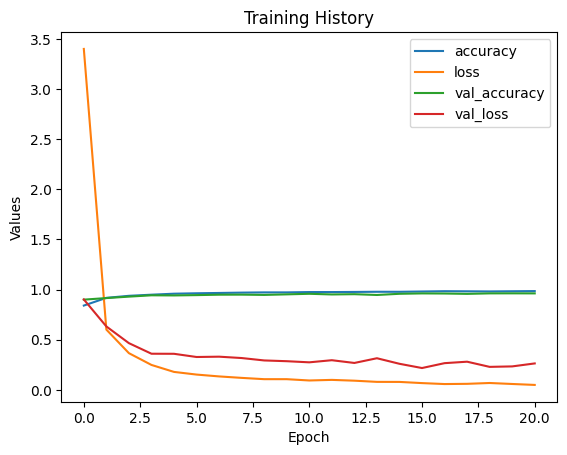

In [4]:
model_1 = keras.Sequential([
    keras.layers.Dense(128, 'relu'),
    keras.layers.Dense(64, 'relu'),
    keras.layers.Dense(10, 'softmax'),
])

model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['accuracy'], 
)

es_callback = keras.callbacks.EarlyStopping(
    patience=5, 
    restore_best_weights=True, 
    verbose=1, 
)

history_1:keras.callbacks.History = model_1.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=50, 
    validation_split=0.2, 
    verbose=2, 
    callbacks=[es_callback], 
)

plot_training(history_1)

# Revision: Normalize data

Planning to normalize the features/labels, as well as some batch normalization

Epoch 1/50
375/375 - 7s - 18ms/step - accuracy: 0.9049 - loss: 0.3315 - val_accuracy: 0.9549 - val_loss: 0.1595
Epoch 2/50
375/375 - 2s - 6ms/step - accuracy: 0.9628 - loss: 0.1252 - val_accuracy: 0.9643 - val_loss: 0.1251
Epoch 3/50
375/375 - 2s - 6ms/step - accuracy: 0.9752 - loss: 0.0838 - val_accuracy: 0.9687 - val_loss: 0.1105
Epoch 4/50
375/375 - 3s - 8ms/step - accuracy: 0.9833 - loss: 0.0565 - val_accuracy: 0.9703 - val_loss: 0.1101
Epoch 5/50
375/375 - 3s - 8ms/step - accuracy: 0.9865 - loss: 0.0445 - val_accuracy: 0.9703 - val_loss: 0.1019
Epoch 6/50
375/375 - 2s - 7ms/step - accuracy: 0.9901 - loss: 0.0341 - val_accuracy: 0.9725 - val_loss: 0.1002
Epoch 7/50
375/375 - 2s - 7ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9709 - val_loss: 0.1098
Epoch 8/50
375/375 - 2s - 7ms/step - accuracy: 0.9934 - loss: 0.0236 - val_accuracy: 0.9722 - val_loss: 0.1094
Epoch 9/50
375/375 - 3s - 7ms/step - accuracy: 0.9944 - loss: 0.0185 - val_accuracy: 0.9713 - val_loss: 0.1156


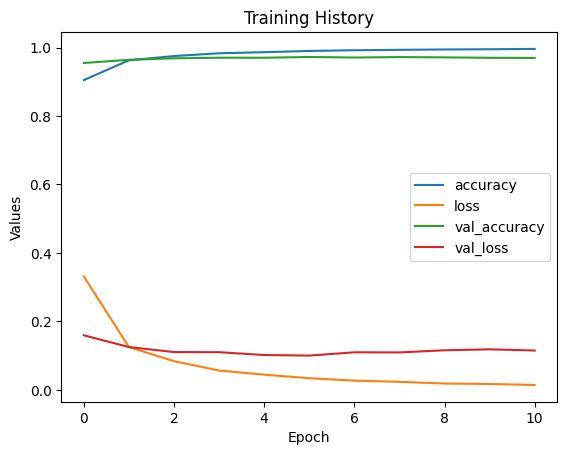

In [5]:
model_2_normalization = keras.layers.Normalization()
model_2_normalization.adapt(X_train)

model_2 = keras.Sequential([
    model_2_normalization,
    keras.layers.Dense(128, 'relu'),
    keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001),
    keras.layers.Dense(64, 'relu'),
    keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001),
    keras.layers.Dense(10, 'softmax'),
])

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['accuracy'], 
)

history_2:keras.callbacks.History = model_2.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=50, 
    validation_split=0.2, 
    verbose=2, 
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=5, 
            restore_best_weights=True, 
            verbose=1, 
        )
    ], 
)

plot_training(history_2)

# Cross-Validation

Still noticing over-fitting--my model should be able to get well above 99%, but 
the validation accuracy is still sitting around 97%. A few things I'm going to 
try:

1. **Model Complexity** - I may have too many units in the 1st and 2nd hidden
   layers.
2. **Dropout** - Dropout may help in place / in addition to batch normalization.
3. **L2 Regularizatioon** - Similar to dropout, this may help.
4. **Learning Rate** - It's possible my learning rate is too low/high, causing
   my model to overfit.

From a seperate file ('mnist-1.py'), found these best parameters:

| Hyperparameter | Value        |
|----------------|--------------|
| Layer 1 Units  |           64 |
| L2 Reg 1       |        0.001 |
| Dropout 1      |            - |
| Layer 2 Units  |           32 |
| L2 Reg 2       |       0.0001 |
| Dropout 2      |          0.3 |
| Learning Rate  |       0.0002 |

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6409 - loss: 1.2638 - val_accuracy: 0.9235 - val_loss: 0.3589
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8928 - loss: 0.4684 - val_accuracy: 0.9439 - val_loss: 0.2697
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9189 - loss: 0.3533 - val_accuracy: 0.9509 - val_loss: 0.2308
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9309 - loss: 0.3029 - val_accuracy: 0.9559 - val_loss: 0.2070
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9396 - loss: 0.2702 - val_accuracy: 0.9584 - val_loss: 0.1945
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.2380 - val_accuracy: 0.9618 - val_loss: 0.1811
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9520 - loss: 0.2202 - val_accuracy: 0.9638 - val_loss: 0.1714
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9520 - loss: 0.2090 - 

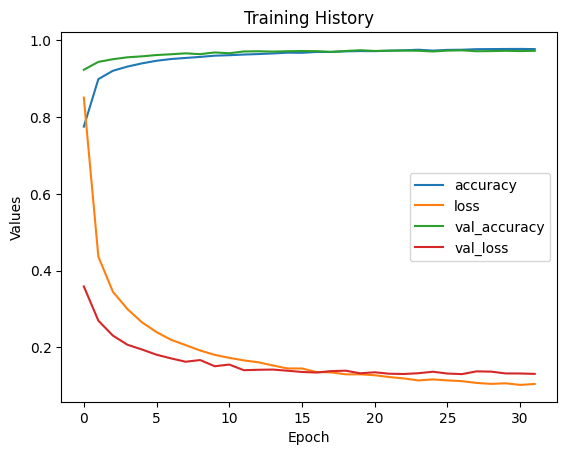

In [5]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

units_1 = 64
l2_reg_1 = keras.regularizers.l2(0.001)
units_2 = 32
l2_reg_2 = keras.regularizers.l2(0.0001)
dropout_rate = 0.3
learning_rate = 0.0002

model_3 = keras.Sequential([
    keras.layers.Dense(units_1, 'relu', kernel_regularizer=l2_reg_1),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units_2, 'relu', kernel_regularizer=l2_reg_2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(dropout_rate),

    keras.layers.Dense(10, 'softmax'),
])

model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
    loss='categorical_crossentropy',
    metrics=['accuracy'], 
)

history_3:keras.callbacks.History = model_3.fit(
    X_train_norm, y_train, 
    epochs=50, 
    validation_split=0.2, 
    verbose=1, 
    callbacks=[
        keras.callbacks.EarlyStopping(
            patience=5, 
            restore_best_weights=True, 
            verbose=1, 
        )
    ], 
)

plot_training(history_3)

# Final Test

In [9]:
_, accuracy = model_3.evaluate(X_test_norm, y_test, verbose=1)
print()
print(f'Final Test Accuracy: {accuracy:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1377

Final Test Accuracy: 97.54%
